In [1]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import numpy as np
import operator

In [2]:
df = pd.read_csv('../data/Motor_Vehicle_Collisions_-_Crashes.csv', low_memory=False)
df.head(3)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/06/2015,22:00,MANHATTAN,10016,40.747009,-73.977187,"(40.747009, -73.9771875)",EAST 36 STREET,3 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3198225,PASSENGER VEHICLE,OTHER,NaN,NaN,NaN
1,03/27/2015,23:50,BROOKLYN,11225,40.658780,-73.960519,"(40.6587795, -73.9605193)",FLATBUSH AVENUE,RUTLAND ROAD,NaN,...,Unspecified,NaN,NaN,NaN,3194615,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,04/15/2015,17:11,BROOKLYN,11221,40.688565,-73.930180,"(40.6885651, -73.9301802)",REID AVENUE,GATES AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3203098,PASSENGER VEHICLE,BUS,NaN,NaN,NaN


In [3]:
from datetime import datetime, timedelta

yesterday = datetime.today() - timedelta(days=5)
last_week = [(yesterday - timedelta(days=x)).strftime('%m/%d/%Y') for x in range(7)]
last_month = [(yesterday - timedelta(days=x)).strftime('%m/%d/%Y') for x in range(30)]
yesterday = yesterday.strftime('%m/%d/%Y')

In [4]:
yesterday_data = df[df["CRASH DATE"] == yesterday]
last_week_data = df[df["CRASH DATE"].isin(last_week)]
last_month_data = df[df["CRASH DATE"].isin(last_month)]

Yesterday:
Number of accidents: 249
Number of people injured: 97
Number of people killed: 1


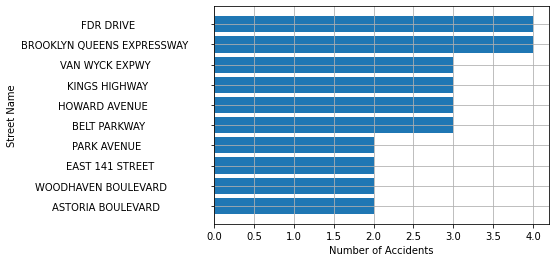

Last week:
Number of accidents: 1777
Number of people injured: 731
Number of people killed: 2


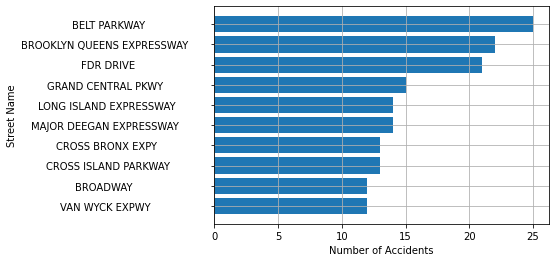

Last month:
Number of accidents: 8435
Number of people injured: 3774
Number of people killed: 25


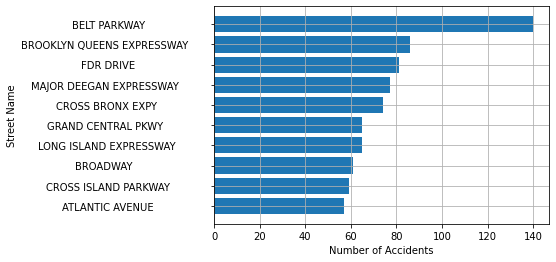

In [5]:
names = ['Yesterday', 'Last week', 'Last month']
datasets = [yesterday_data, last_week_data, last_month_data]

for name, data in zip(names, datasets):
    injured = int(data['NUMBER OF PERSONS INJURED'].sum())
    killed = int(data['NUMBER OF PERSONS KILLED'].sum())
    street_info = data['ON STREET NAME'].value_counts()[:10].to_dict()
    
    print(f"{name}:")
    print(f"Number of accidents: {len(data)}")
    print(f"Number of people injured: {injured}")
    print(f"Number of people killed: {killed}")
    
    f = plt.figure(figsize=(6,4))
    plt.barh(np.arange(9, -1, -1), street_info.values())
    plt.yticks(np.arange(9, -1, -1), street_info.keys())
    plt.ylabel('Street Name')
    plt.xlabel('Number of Accidents')
    plt.grid()
    plt.show()

# Viz

In [6]:
yesterday_w_loc = yesterday_data.dropna(subset=['LOCATION'])
yesterday_w_loc

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
324,12/07/2020,19:27,BRONX,10475,40.871470,-73.830570,"(40.87147, -73.83057)",ALCOTT PLACE,ASCH LOOP,NaN,...,NaN,NaN,NaN,NaN,4374449,Sedan,NaN,NaN,NaN,NaN
372,12/07/2020,6:00,QUEENS,11372,40.755264,-73.888170,"(40.755264, -73.88817)",NORTHERN BOULEVARD,79 STREET,NaN,...,NaN,NaN,NaN,NaN,4374434,Taxi,NaN,NaN,NaN,NaN
36726,12/07/2020,18:30,BROOKLYN,11224,40.578003,-73.993700,"(40.578003, -73.9937)",NEPTUNE AVENUE,WEST 27 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4374043,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
36843,12/07/2020,17:00,QUEENS,11419,40.693115,-73.819770,"(40.693115, -73.81977)",127 STREET,97 AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,4374266,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN
36901,12/07/2020,16:09,BROOKLYN,11210,40.638428,-73.951164,"(40.638428, -73.951164)",FOSTER AVENUE,ROGERS AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4374090,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52287,12/07/2020,16:24,BRONX,10455,40.809600,-73.903020,"(40.8096, -73.90302)",BRUCKNER EXPRESSWAY,EAST 149 STREET,NaN,...,NaN,NaN,NaN,NaN,4374083,Sedan,NaN,NaN,NaN,NaN
52345,12/07/2020,17:30,QUEENS,11375,40.715660,-73.855600,"(40.71566, -73.8556)",68 AVENUE,KESSEL STREET,NaN,...,NaN,NaN,NaN,NaN,4374860,Sedan,NaN,NaN,NaN,NaN
52413,12/07/2020,14:55,QUEENS,11368,40.748950,-73.854485,"(40.74895, -73.854485)",111 STREET,44 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4374107,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
52632,12/07/2020,8:06,NaN,NaN,40.699930,-73.961880,"(40.69993, -73.96188)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Unspecified,Unspecified,NaN,NaN,4374607,Station Wagon/Sport Utility Vehicle,Pick-up Truck,Tractor Truck Diesel,NaN,NaN


In [7]:
crash_times = yesterday_w_loc['CRASH TIME'].tolist()
streets = yesterday_w_loc['ON STREET NAME'].tolist()
yesterday_coords = yesterday_w_loc['LOCATION'].apply(lambda x: 
                                          [float(coord) for coord in x[1:-1].split(', ')]).tolist()

In [8]:
import folium

ny_map = folium.Map(location=[40.7306, -73.9352])

for crash_time, street, coord in zip(crash_times, streets, yesterday_coords):
    popup = f"Crash Time: {crash_time}, Street: {street}"
    folium.Marker(
        location=coord,
        popup=popup,
        icon=folium.Icon(color='red', icon='info', prefix='fa')
    ).add_to(ny_map)
ny_map

In [9]:
ny_map.save('map.html')